In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
from scipy import signal
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

In [3]:
sns.set(style="whitegrid")

In [4]:
las= lasio.read('Sonic_P_and_S_Output_7240ft_350ft.las')

In [5]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [6]:
las.sections['Curves']

[CurveItem(mnemonic="DEPT", unit="F", value="00 001 00 00", descr="Depth Index", original_mnemonic="DEPT", data.shape=(13781,)),
 CurveItem(mnemonic="RLA0", unit="OHMM", value="", descr="1 Apparent Resistivity from Computed Focusing Mode 0", original_mnemonic="RLA0", data.shape=(13781,)),
 CurveItem(mnemonic="RLA1", unit="OHMM", value="", descr="2 Apparent Resistivity from Computed Focusing Mode 1", original_mnemonic="RLA1", data.shape=(13781,)),
 CurveItem(mnemonic="RLA2", unit="OHMM", value="", descr="3 Apparent Resistivity from Computed Focusing Mode 2", original_mnemonic="RLA2", data.shape=(13781,)),
 CurveItem(mnemonic="RLA3", unit="OHMM", value="", descr="4 Apparent Resistivity from Computed Focusing Mode 3", original_mnemonic="RLA3", data.shape=(13781,)),
 CurveItem(mnemonic="RLA4", unit="OHMM", value="", descr="5 Apparent Resistivity from Computed Focusing Mode 4", original_mnemonic="RLA4", data.shape=(13781,)),
 CurveItem(mnemonic="RLA5", unit="OHMM", value="", descr="6 Appare

In [7]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
RLA0
RLA1
RLA2
RLA3
RLA4
RLA5
RT_HRLT
AT10
AT20
AT30
AT60
AT90
RT
RXOZ
BS
DCAL
HCAL
HDAR
HD1_PPC1
HD2_PPC1
TENS
GR_EDTC
NPHI
NPOR
PEFZ
RHOZ
DPHZ
SPHI
VCL_HILT
DTCO
DTSM
DTSM_FAST
DTST
PR
PR_FAST
VPVS
VPVS_FAST
CHR_FAST
CHR_XD
CHRP
TICO
MAXXENE_OVERALL
MINXENE_OVERALL


In [8]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, 	 Units: F, 	 Description: Depth Index
Curve: RLA0, 	 Units: OHMM, 	 Description: 1 Apparent Resistivity from Computed Focusing Mode 0
Curve: RLA1, 	 Units: OHMM, 	 Description: 2 Apparent Resistivity from Computed Focusing Mode 1
Curve: RLA2, 	 Units: OHMM, 	 Description: 3 Apparent Resistivity from Computed Focusing Mode 2
Curve: RLA3, 	 Units: OHMM, 	 Description: 4 Apparent Resistivity from Computed Focusing Mode 3
Curve: RLA4, 	 Units: OHMM, 	 Description: 5 Apparent Resistivity from Computed Focusing Mode 4
Curve: RLA5, 	 Units: OHMM, 	 Description: 6 Apparent Resistivity from Computed Focusing Mode 5
Curve: RT_HRLT, 	 Units: OHMM, 	 Description: 7 HRLT True Formation Resistivity
Curve: AT10, 	 Units: OHMM, 	 Description: 8 AIT TWO FOOT RESISTIVITY A10
Curve: AT20, 	 Units: OHMM, 	 Description: 9 AIT TWO FOOT RESISTIVITY A20
Curve: AT30, 	 Units: OHMM, 	 Description: 10 AIT TWO FOOT RESISTIVITY A30
Curve: AT60, 	 Units: OHMM, 	 Description: 11 AIT TWO FOOT RESISTIVIT

In [9]:
well = las.df()

In [10]:
well.head()

,RLA0,RLA1,RLA2,RLA3,RLA4,RLA5,RT_HRLT,AT10,AT20,AT30,...,PR,PR_FAST,VPVS,VPVS_FAST,CHR_FAST,CHR_XD,CHRP,TICO,MAXXENE_OVERALL,MINXENE_OVERALL
DEPT,,,,,,,,,,,,,,,,,,,,,
7240.0,0.03567,2.66649,16.74514,52.85175,77.98207,83.50034,112.57508,NaN,NaN,NaN,...,0.25531,0.2422,1.74454,1.71448,0.99586,0.99657,1.01302,820.26038,3.50627,0.40067
7239.5,0.03567,2.84599,17.63409,55.33049,81.24451,86.31766,116.08698,NaN,NaN,NaN,...,0.25531,0.2422,1.74454,1.71448,0.99589,0.99657,1.01302,820.26038,3.50627,0.40067
7239.0,0.03567,3.29378,18.70689,57.72603,84.21562,88.53780,131.14244,NaN,NaN,NaN,...,0.25531,0.2422,1.74454,1.71449,0.99594,0.99657,1.01302,820.26038,3.50627,0.40067
7238.5,0.03567,5.26073,22.63879,60.62992,86.46330,89.90987,134.22372,NaN,NaN,NaN,...,0.25531,0.2422,1.74454,1.71449,0.99600,0.99657,1.01302,820.26038,3.50627,0.40067
7238.0,0.03567,8.04574,34.95535,69.13100,91.33515,93.76358,136.13567,NaN,NaN,NaN,...,0.25531,0.2422,1.74454,1.71449,0.99606,0.99657,1.01302,820.26038,3.50627,0.40067


In [11]:
well.index

Index([7240.0, 7239.5, 7239.0, 7238.5, 7238.0, 7237.5, 7237.0, 7236.5, 7236.0,
       7235.5,
       ...
        354.5,  354.0,  353.5,  353.0,  352.5,  352.0,  351.5,  351.0,  350.5,
        350.0],
      dtype='float64', name='DEPT', length=13781)

<AxesSubplot:xlabel='DEPT'>

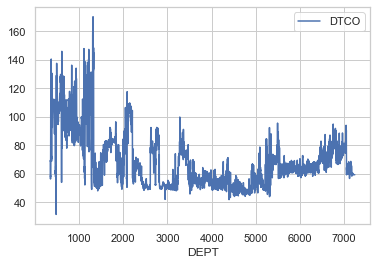

In [12]:
well.plot(y='DTCO')

<AxesSubplot:xlabel='DEPT'>

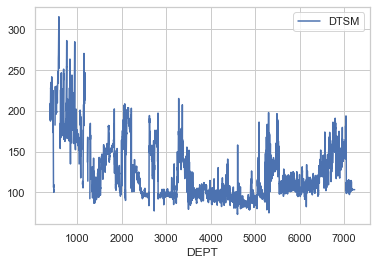

In [13]:
well.plot(y='DTSM')

<AxesSubplot:xlabel='DEPT'>

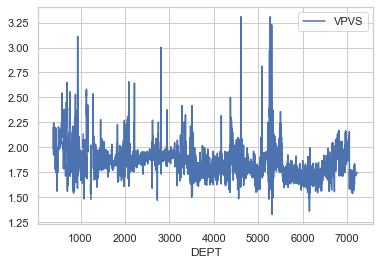

In [14]:
well.plot(y='VPVS')

<AxesSubplot:xlabel='DEPT', ylabel='velocity(ft/us)'>

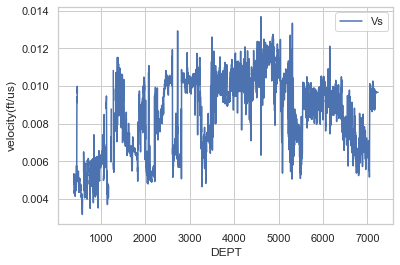

In [15]:
well['Vs']=1/well['DTSM']
well.plot(y='Vs',ylabel='velocity(ft/us)')

<AxesSubplot:xlabel='DEPT', ylabel='velocity(ft/us)'>

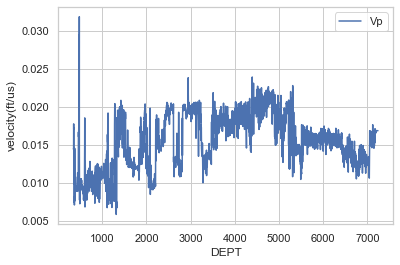

In [16]:
well['Vp']=1/well['DTCO']
well.plot(y='Vp',ylabel='velocity(ft/us)')

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

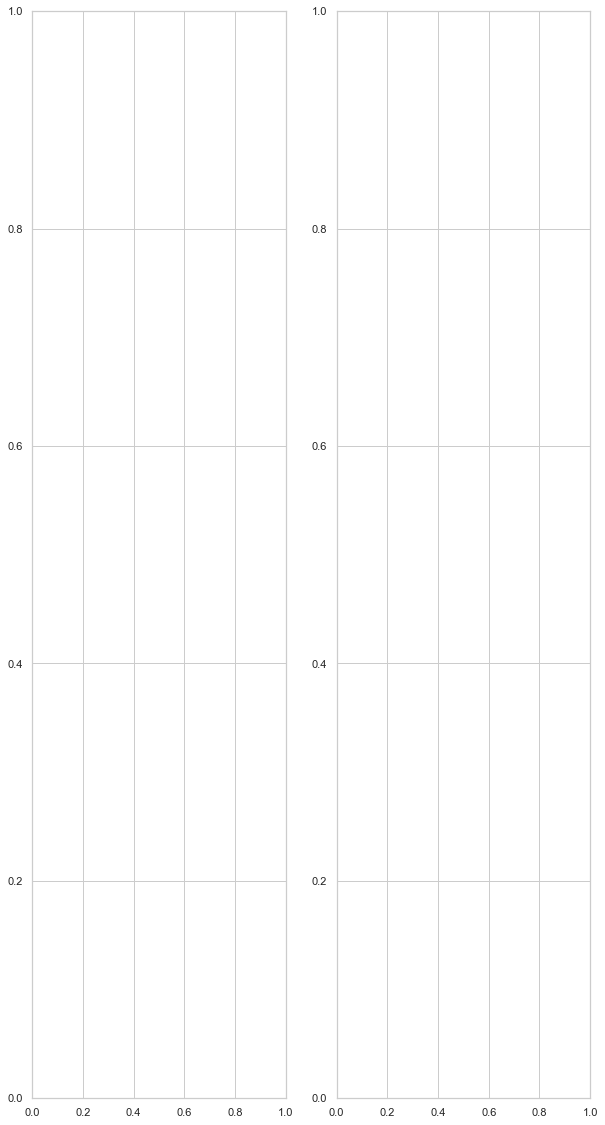

In [17]:
fig=plt.figure(figsize=(10,20))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
ax1.plot(well['Vs'],well.index, color='r')
ax2.plot(well['Vp'],well.index, color='g')
ax1.invert_yaxis()
ax2.invert_yaxis()

ax1.set_xlabel('Velocity (ft/$\mu$s)')
ax1.set_ylabel('Depth (ft)')
ax2.set_xlabel('Velocity (ft/$\mu$s)')
ax2.set_ylabel('Depth (ft)')

ax1.set_title('Vs')
ax2.set_title('Vp')

In [ ]:
plt.figure(figsize=(8, 20))

plt.plot(well['VPVS'],well.index,'b-',label='Vp/Vs')
plt.ylabel('DEPTH (ft)')
plt.title("Vp/Vs")
plt.legend()

plt.gca().invert_yaxis()

plt.show()

In [ ]:
fig1=plt.figure(figsize=(10,20))
ax11= fig1.add_subplot(1,2,1)
ax12= fig1.add_subplot(1,2,2)
ax11.plot(1/well['DTSM_FAST'],well.index, color='m')
ax12.plot(1/well['DTST'],well.index, color='orange')
ax11.invert_yaxis()
ax12.invert_yaxis()

ax11.set_xlabel('Velocity fast shear waves (ft/$\mu$s)')
ax11.set_ylabel('Depth (ft)')
ax12.set_xlabel('Velocity Stoneley waves(ft/$\mu$s)')
ax12.set_ylabel('Depth (ft)')

ax11.set_title('fast shear waves')
ax12.set_title('Stoneley waves')

In [ ]:
# Crear la figura con una cuadrícula de 1 fila y 4 columnas
fig, axes = plt.subplots(1, 4, figsize=(20, 10))

marker_size=3

# Primer gráfico (Vs)
axes[0].plot(well['Vs'], well.index, color='r', marker='o', linestyle='None', markersize=marker_size)
axes[0].invert_yaxis()
axes[0].set_xlabel('Velocity (ft/$\mu$s)')
axes[0].set_ylabel('Depth (ft)')
axes[0].set_title('Vs')

# Segundo gráfico (Vp)
axes[1].plot(well['Vp'], well.index, color='g', marker='o', linestyle='None', markersize=marker_size)
axes[1].invert_yaxis()
axes[1].set_xlabel('Velocity (ft/$\mu$s)')
axes[1].set_ylabel('Depth (ft)')
axes[1].set_title('Vp')

# Tercer gráfico (DTSM_FAST)
axes[2].plot(1/well['DTSM_FAST'], well.index, color='m', marker='o', linestyle='None', markersize=marker_size)
axes[2].invert_yaxis()
axes[2].set_xlabel('Velocity fast shear waves (ft/$\mu$s)')
axes[2].set_ylabel('Depth (ft)')
axes[2].set_title('Fast shear waves')

# Cuarto gráfico (DTST)
axes[3].plot(1/well['DTST'], well.index, color='orange', marker='o', linestyle='None', markersize=marker_size)
axes[3].invert_yaxis()
axes[3].set_xlabel('Velocity Stoneley waves (ft/$\mu$s)')
axes[3].set_ylabel('Depth (ft)')
axes[3].set_title('Stoneley waves')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
fig_n, axes_n = plt.subplots(1, 2, figsize=(20, 15))

# Primer gráfico (Vp/Vs)
axes_n[0].plot(well['VPVS'], well.index, color='darkorchid', marker='o', linestyle='None', markersize=marker_size)
axes_n[0].invert_yaxis()
axes_n[0].set_xlabel('ratio vp/vs')
axes_n[0].set_ylabel('Depth (ft)')
axes_n[0].set_title('Vs')

axes_n[1].plot(well['VPVS_FAST'], well.index, color='hotpink', marker='o', linestyle='None', markersize=marker_size)
axes_n[1].invert_yaxis()
axes_n[1].set_xlabel('ratio $vp/vs_{fast}$')
axes_n[1].set_ylabel('Depth (ft)')
axes_n[1].set_title('Vp/Vs_FAST')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### Smooth the data

In [ ]:
well_clean = well.dropna(subset=['Vs', 'Vp', 'DTSM_FAST', 'DTST','VPVS','VPVS_FAST','RHOZ'])

depth = well_clean.index.values

In [ ]:
def moving_average(data, window_size):
    averaged_data = []
    for i in range(len(data)):
        if i < window_size - 1:
            averaged_data.append(np.nan)  # Si no hay suficientes datos para llenar la ventana, agregar NaN
        else:
            window = data[i - window_size + 1:i + 1]
            window_average = np.mean(window)
            averaged_data.append(window_average)
    return np.array(averaged_data)

In [ ]:
filt_l=200
tair_mov_average=moving_average(well_clean['Vs'].values,filt_l)

In [ ]:
plt.figure(figsize=(4,7))

plt.plot(well_clean['Vs'],depth)
plt.plot(tair_mov_average,depth)
plt.plot(signal.savgol_filter(well_clean['Vs'].values, 250, 5),depth)
plt.gca().invert_yaxis()

In [ ]:
print(well['Vs'].values)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=well_clean['Vs'].values,
    y=depth,
    mode='markers',
    marker=dict(size=2, color='mediumpurple'),
    name='Vs'
))

fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['Vs'].values, 250, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=6,
        color='black',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay pol 3'
))
fig.add_trace(go.Scatter(
    x=tair_mov_average,  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=6,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='mov average'
))
fig.update_layout(
    width=800,  # Ajusta el ancho según tus necesidades
    height=1000,  # Ajusta la altura para hacer la figura más larga
    yaxis_autorange='reversed' 
)
fig.show()

In [ ]:
#todas las graficas lol

In [ ]:
fig = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=("Vs", "Vp", "Fast shear waves", "Stoneley waves"))

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['Vs'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Vs'
),row=1, col=1)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['Vp'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumaquamarine',
        symbol='triangle-up'
    ),
    name='Vp'
),row=1, col=2)

# Añadir la tercera subtrama (Fast shear waves)

fig.add_trace(go.Scatter(
    x=signal.savgol_filter(1/well_clean['DTSM_FAST'].values, 150, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Fast shear waves'
),row=1, col=3)

# Añadir la cuarta subtrama (Stoneley waves)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(1/well_clean['DTST'].values, 150, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='steelblue',
        symbol='triangle-up'
    ),
    name='Stoneley waves'
),row=1, col=4)

# Invertir el eje y en todas las subtramas
fig.update_yaxes(autorange='reversed')

# Ajustar el diseño
fig.update_layout(
    width=1200,  # Ajusta el ancho de la figura
    height=600,  # Ajusta la altura de la figura
    showlegend=False,
    title_text="Well Data"
)

# Mostrar la figura
fig.show()

In [ ]:
well.plot(y='RHOZ')

In [ ]:
fig = make_subplots(rows=1, cols=7, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp", "Fast shear waves", "Stoneley waves","Vp/Vs", "Vp/vs_Fast"))

fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['RHOZ'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Density'
),row=1, col=1)

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['Vs'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Vs'
),row=1, col=2)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['Vp'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumaquamarine',
        symbol='triangle-up'
    ),
    name='Vp'
),row=1, col=3)

# Añadir la tercera subtrama (Fast shear waves)

fig.add_trace(go.Scatter(
    x=signal.savgol_filter(1/well_clean['DTSM_FAST'].values, 150, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Fast shear waves'
),row=1, col=4)

# Añadir la cuarta subtrama (Stoneley waves)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(1/well_clean['DTST'].values, 150, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='steelblue',
        symbol='triangle-up'
    ),
    name='Stoneley waves'
),row=1, col=5)

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['VPVS'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Vp/Vs'
),row=1, col=6)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=signal.savgol_filter(well_clean['VPVS_FAST'].values, 300, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    y=depth,
    marker=dict(
        size=2,
        color='mediumaquamarine',
        symbol='triangle-up'
    ),
    name='Vp'
),row=1, col=7)

# Añadir la tercera subtrama (Fast shear waves)



# Invertir el eje y en todas las subtramas
fig.update_yaxes(autorange='reversed')

# Ajustar el diseño
fig.update_layout(
    width=1200,  # Ajusta el ancho de la figura
    height=600,  # Ajusta la altura de la figura
    showlegend=False,
    title_text="Well Data"
)

# Mostrar la figura
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp"))

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['RHOZ'].values,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Density'
),row=1, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vp'].values,
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='Vp'
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vs'].values,
    marker=dict(
        size=2,
        color='orange',
        symbol='triangle-up'
    ),
    name='Vs'
),row=3, col=1)
fig.update_xaxes(title_text="Depth", row=3, col=1)

##### Datos sin outliers

In [ ]:
sns.boxplot(well_clean['Vp'].values)

In [ ]:
sns.boxplot(well_clean['Vs'].values)

In [ ]:
def removal_box_plot(df, column, threshold,threshold2):
    sns.boxplot(df[column].values)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers1 = df[df[column].values <= threshold]
    removed_outliers = removed_outliers1[removed_outliers1[column].values >= threshold2]
 
    sns.boxplot(removed_outliers[column].values)
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

In [ ]:
threshold_value = 2.95
threshold_value2 =2.3
 
no_outliers = removal_box_plot(well_clean, 'RHOZ', threshold_value,threshold_value2)

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp"))

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=no_outliers['RHOZ'].values,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Density'
),row=1, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vp'].values,
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='Vp'
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vs'].values,
    marker=dict(
        size=2,
        color='orange',
        symbol='triangle-up'
    ),
    name='Vs'
),row=3, col=1)
fig.update_xaxes(title_text="Depth", row=3, col=1)

Hay que suavizar los datos y ponerlos hasta 2000 ft por lo que es para la subsurface level

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp"))

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=no_outliers['RHOZ'].values,
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Density'
),row=1, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vp'].values,
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='Vp'
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=depth,  # Ventana de tamaño 53 y polinomio de orden 3
    y=well_clean['Vs'].values,
    marker=dict(
        size=2,
        color='orange',
        symbol='triangle-up'
    ),
    name='Vs'
),row=3, col=1)
fig.update_xaxes(title_text="Depth", range=[946, 2000], row=1, col=1)
fig.update_xaxes(title_text="Depth", range=[395, 2000], row=2, col=1)
fig.update_xaxes(title_text="Depth", range=[395, 2000], row=3, col=1)

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp"))

fig.add_trace(go.Scatter(
    x=depth,
    y=signal.savgol_filter(well_clean['RHOZ'].values, 56, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='purple',
        symbol='triangle-up'
    ),
    name='Density'
),row=1, col=1)

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=depth,
    y=signal.savgol_filter(well_clean['Vs'].values, 50, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Vs'
),row=2, col=1)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=depth,
    y=signal.savgol_filter(well_clean['Vp'].values, 50, 5),  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='Vp'
),row=3, col=1)



# Ajustar el diseño
fig.update_xaxes(range=[395, 2400], row=1, col=1)
fig.update_xaxes(range=[395, 2400], row=2, col=1)
fig.update_xaxes(title_text="Depth", range=[395, 2400], row=3, col=1)
# Mostrar la figura
fig.show()

In [ ]:
Density_smooth = signal.savgol_filter(well_clean['RHOZ'].values, 200, 3)
Vp_smooth = signal.savgol_filter(well_clean['Vp'].values, 200, 3)
Vs_smooth = signal.savgol_filter(well_clean['Vs'].values, 200, 3)

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Density", "Vs", "Vp"))

fig.add_trace(go.Scatter(
    x=depth,
    y=well_clean['RHOZ'].values,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='Before smoothening'
),row=1, col=1)
fig.add_trace(go.Scatter(
    x=depth,
    y=Density_smooth,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening'
),row=1, col=1)

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=depth,
    y=well_clean['Vs'].values,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='Before smoothening',
    showlegend=False
),row=2, col=1)
fig.add_trace(go.Scatter(
    x=depth,
    y=Vs_smooth,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=2, col=1)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=depth,
    y=well_clean['Vp'].values,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=3, col=1)
fig.add_trace(go.Scatter(
    x=depth,
    y=Vp_smooth,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=3, col=1)



# Ajustar el diseño
fig.update_xaxes(range=[395, 5600], row=1, col=1)
fig.update_xaxes(range=[395, 5600], row=2, col=1)
fig.update_xaxes(title_text="Depth", range=[395, 5400], row=3, col=1)
# Mostrar la figura
fig.show()

In [ ]:
Nx = 10000
Nz = int(well_clean['RHOZ'].size)
den2d = np.zeros([Nx,Nz])
for i in range(0,Nx):
    den2d[i] = Density_smooth
    

In [ ]:
plt.imshow(den2d.T)

In [ ]:
Nx = 10000
Nz = int(well_clean['Vs'].size)
vs2d = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vs2d[i] = Vs_smooth
    

In [ ]:
plt.imshow(vs2d.T)

In [ ]:
Nx = 10000
Nz = int(well_clean['Vp'].size)
vp2d = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vp2d[i] = Vp_smooth
    

In [ ]:
plt.imshow(vp2d.T)

## Conv de unidades

In [ ]:
#unidades ft/us a m/s
vp_ms=Vp_smooth*0.3048*(10**6)
vs_ms=Vs_smooth*0.3048*(10**6)

vp_org_ms= well_clean['Vp']*0.3048*(10**6)
vs_org_ms= well_clean['Vs']*0.3048*(10**6)

depth_m=depth*0.3048

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True, subplot_titles=("Vp", "Vs", "density"))

# Añadir la primera subtrama (Vs)
fig.add_trace(go.Scatter(
    x=depth_m,
    y=vs_org_ms,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='Before smoothening',
    showlegend=True
),row=1, col=1)
fig.add_trace(go.Scatter(
    x=depth_m,
    y=vs_ms,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=True
),row=1, col=1)

# Añadir la segunda subtrama (Vp)
fig.add_trace(go.Scatter(
    x=depth_m,
    y=vp_org_ms,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=2, col=1)
fig.add_trace(go.Scatter(
    x=depth_m,
    y=vp_ms,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=2, col=1)


fig.add_trace(go.Scatter(
    x=depth_m,
    y=well_clean['RHOZ'].values,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='blue',
        symbol='triangle-up'
    ),
    name='Before smoothening',
    showlegend=False
),row=3, col=1)

fig.add_trace(go.Scatter(
    x=depth_m,
    y=Density_smooth,  # Ventana de tamaño 53 y polinomio de orden 3
    marker=dict(
        size=2,
        color='hotpink',
        symbol='triangle-up'
    ),
    name='After smoothening',
    showlegend=False
),row=3, col=1)


# Ajustar el diseño
#fig.update_xaxes(range=[395, 5600], row=1, col=1)
#fig.update_xaxes(range=[395, 5600], row=2, col=1)
fig.update_xaxes(title_text="Depth (m)", row=3, col=1)
fig.update_yaxes(title_text="Vp (m/s)", row=1, col=1)
fig.update_yaxes(title_text="Vs (m/s)", row=2, col=1)
fig.update_yaxes(title_text="$Density (g/cm^{3})$", row=3, col=1)
# Mostrar la figura
fig.show()

In [ ]:
Nx = 10000
Nz = int(vp_ms.size)
vp2d = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vp2d[i] = vp_ms

In [ ]:
im = plt.imshow(vp2d.T, cmap="copper")
cbar = plt.colorbar(im)
cbar.set_label("Colorbar")
plt.show()

In [ ]:
Nx = 10000
Nz = int(vs_ms.size)
vs2d = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vs2d[i] = vs_ms

In [ ]:
im2 = plt.imshow(vs2d.T, cmap="copper")
cbar = plt.colorbar(im2)
cbar.set_label("velocity values (m/s)")
plt.show()

In [ ]:
VS_250=signal.savgol_filter(well_clean['Vs'].values, 200, 5)*0.3048*(10**6)
Nx = 10000
Nz = int(VS_250.size)
vs2d250 = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vs2d250[i] = VS_250

In [ ]:
im3 = plt.imshow(vs2d250.T, cmap="copper")
cbar = plt.colorbar(im3)
cbar.set_label("velocity values (m/s)")
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# Primer gráfico 250,5
im3 = axs[0].imshow(vs2d250.T, cmap="copper")
cbar = fig.colorbar(im3, ax=axs[0])  
cbar.set_label("velocity values (m/s)")

# Segundo gráfico 250,3
im2 = axs[1].imshow(vs2d.T, cmap="copper")
cbar = fig.colorbar(im2, ax=axs[1])
cbar.set_label("velocity values (m/s)")

plt.show()


### intervalos

In [ ]:
# Definir los intervalos de velocidad
vp_intervals = [1000, 1500, 2000, 2500, 3000, 3500, 4000]
vs_intervals = [2000, 3000, 4000, 5000, 6000]
density_intervals = [1.5, 2.0, 2.5, 3.0]

# Crear una función para asignar cada valor al intervalo correspondiente
def categorize_intervals(data, intervals):
    categorized = np.digitize(data, intervals, right=True)
    return categorized

# Categorizar los datos suavizados
vp_categorized = categorize_intervals(vp_ms, vp_intervals)
vs_categorized = categorize_intervals(vs_ms, vs_intervals)
density_categorized = categorize_intervals(Density_smooth, density_intervals)

In [ ]:
# Definir dimensiones
Nx = 10000
Nz_vp = vp_categorized.size
Nz_vs = vs_categorized.size
Nz_density = density_categorized.size

# Crear matrices 2D con los datos categorizados
vp_2d_cat = np.zeros([Nx, Nz_vp])
vs_2d_cat = np.zeros([Nx, Nz_vs])
density_2d_cat = np.zeros([Nx, Nz_density])

for i in range(Nx):
    vp_2d_cat[i] = vp_categorized
    vs_2d_cat[i] = vs_categorized
    density_2d_cat[i] = density_categorized


In [ ]:
def create_interval_labels(intervals):
    return [f"<{intervals[0]}"] + [f"{intervals[i]}-{intervals[i+1]}" for i in range(len(intervals)-1)] + [f">{intervals[-1]}"]

# Graficar los intervalos de Velocidad de Ondas P
plt.figure(figsize=(10, 6))
im_vp = plt.imshow(vp_2d_cat.T, cmap="copper", aspect='auto')
cbar = plt.colorbar(im_vp)
cbar.set_ticks(np.arange(len(vp_intervals) + 1))
cbar.set_ticklabels(create_interval_labels(vp_intervals))
cbar.set_label("Vp Intervals (m/s)")
plt.title("Mapa de Intervalos de Velocidad de Ondas P")
plt.xlabel("Indice de Muestra")
plt.ylabel("Profundidad")
plt.show()

# Graficar los intervalos de Velocidad de Ondas S
plt.figure(figsize=(10, 6))
im_vs = plt.imshow(vs_2d_cat.T, cmap="copper", aspect='auto')
cbar = plt.colorbar(im_vs)
cbar.set_ticks(np.arange(len(vs_intervals) + 1))
cbar.set_ticklabels(create_interval_labels(vs_intervals))
cbar.set_label("Vs Intervals (m/s)")
plt.title("Mapa de Intervalos de Velocidad de Ondas S")
plt.xlabel("Indice de Muestra")
plt.ylabel("Profundidad")
plt.show()

# Graficar los intervalos de Densidad
plt.figure(figsize=(10, 6))
im_density = plt.imshow(density_2d_cat.T, cmap="copper", aspect='auto')
cbar = plt.colorbar(im_density)
cbar.set_ticks(np.arange(len(density_intervals) + 1))
cbar.set_ticklabels(create_interval_labels(density_intervals))
cbar.set_label("Density Intervals (g/cm³)")
plt.title("Mapa de Intervalos de Densidad")
plt.xlabel("Indice de Muestra")
plt.ylabel("Profundidad")
plt.show()


### función de smoothening manual

In [ ]:
velp_prom_ms=moving_average(vp_org_ms.values,filt_l)
vels_prom_ms=moving_average(vs_org_ms.values,filt_l)

In [ ]:
Nx = 10000
Nz = int(velp_prom_ms.size)
vp_pr = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vp_pr[i] = velp_prom_ms

In [ ]:
im3n = plt.imshow(vp_pr.T, cmap="copper")
cbar = plt.colorbar(im3n)
cbar.set_label("velocity values (m/s)")
plt.show()

In [ ]:
Nx = 10000
Nz = int(vels_prom_ms.size)
vs_pr = np.zeros([Nx,Nz])
for i in range(0,Nx):
    vs_pr[i] = vels_prom_ms

In [ ]:
im2n = plt.imshow(vs_pr.T, cmap="copper")
cbar = plt.colorbar(im2n)
cbar.set_label("velocity values (m/s)")
plt.show()